In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analyzing Netflix dataset to get insights related to the Movies/Show being streamed on that platform and dive into the various categories, content for different age and identify the most popular movie/season

#Analyzing Netflix Dataset

##Load the data

In [25]:
df = pd.read_csv('NetflixDataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Displaying the first 5 rows to get a feel of what type of data is present in the dataset

**Find out the shape of the dataset**

In [26]:
df.shape

(7789, 11)

we can see we have **7789** rows and **11** columns in the dataset

**Identify the various columns and their datatypes**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


we can observe that we have some null values present in the dataset that we need to handle before starting our analysis
columns with null values that need to be handles:
* Director
* Cast
* Country
* Release Date

We can see that all features are objects therefore we can not perform statistic calculations

<Axes: >

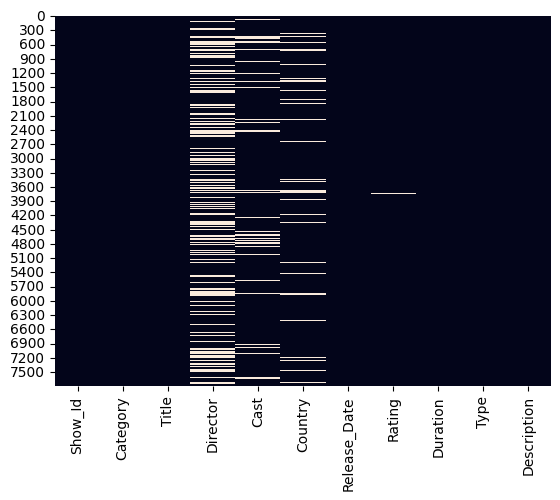

In [28]:
sns.heatmap(df.isnull(),cbar=False)

The white lines show that these columns contain null values, hence strengthing my statement of the above mentioned columns containing null values

In [29]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

##Cleaning the data



**Drop the rows with null values**

In [30]:
df.dropna(inplace=True)

confirm that the rows have been dropped and we dont have any null values in our dataset

In [31]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4811 entries, 1 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       4811 non-null   object
 1   Category      4811 non-null   object
 2   Title         4811 non-null   object
 3   Director      4811 non-null   object
 4   Cast          4811 non-null   object
 5   Country       4811 non-null   object
 6   Release_Date  4811 non-null   object
 7   Rating        4811 non-null   object
 8   Duration      4811 non-null   object
 9   Type          4811 non-null   object
 10  Description   4811 non-null   object
dtypes: object(11)
memory usage: 451.0+ KB


We can see that we have a total of **4811** entries and we have **4811** non null values, therefore we can confirm that the null values have been dropped

##Visualisations

**Displaying the Frequency of each rating movie/season available on the platform**

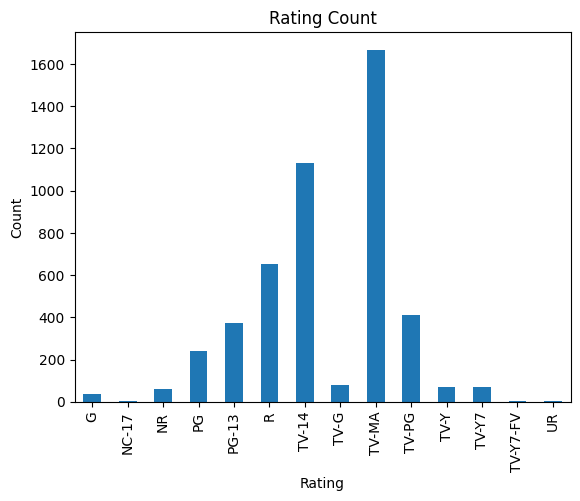

In [33]:
df.groupby('Rating')['Show_Id'].count().plot(
    kind ='bar',
    xlabel = 'Rating',
    ylabel = 'Count',
    title = 'Rating Count'
);

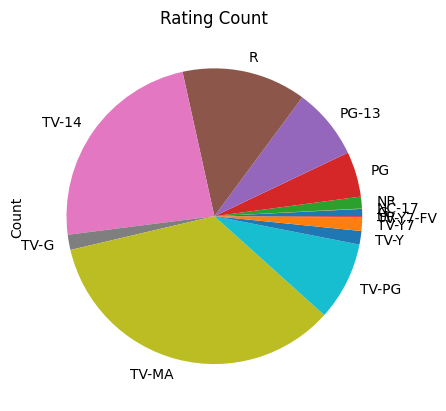

In [34]:
df.groupby('Rating')['Show_Id'].count().plot(
    kind ='pie',
    xlabel = 'Rating',
    ylabel = 'Count',
    title = 'Rating Count'
);

**Visualising the distribution of seasons & movies in the highest rating**

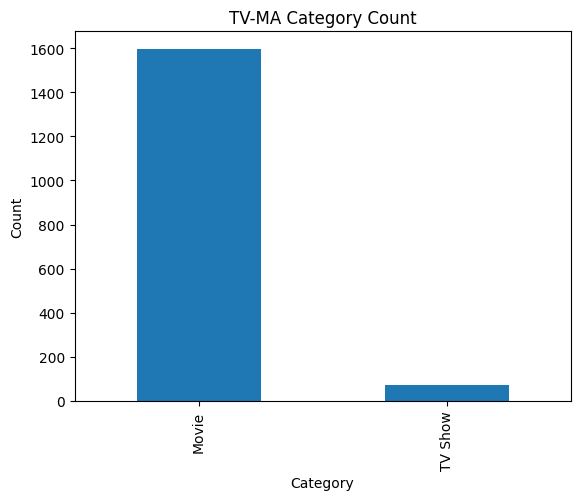

In [35]:
df.groupby('Rating').get_group('TV-MA').groupby('Category')['Title'].count().plot(
    kind = 'bar',
    xlabel = 'Category',
    ylabel = 'Count',
    title = 'TV-MA Category Count'
);

In [36]:
rate = df.groupby('Rating')['Show_Id'].count()

In [37]:
rate =rate.sort_values(ascending=False)

**Pie Chart to show distribution**

<Axes: title={'center': 'Rating Count'}, ylabel='Count'>

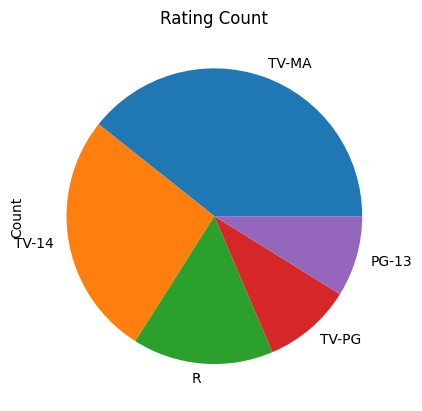

In [38]:
rate = rate.head()
rate.plot(
    kind = 'pie',
    xlabel = 'Rating',
    ylabel = 'Count',
    title = 'Rating Count'
)

**Visualising the Top 5 ratings**

<Axes: title={'center': 'Rating Count'}, xlabel='Rating', ylabel='Count'>

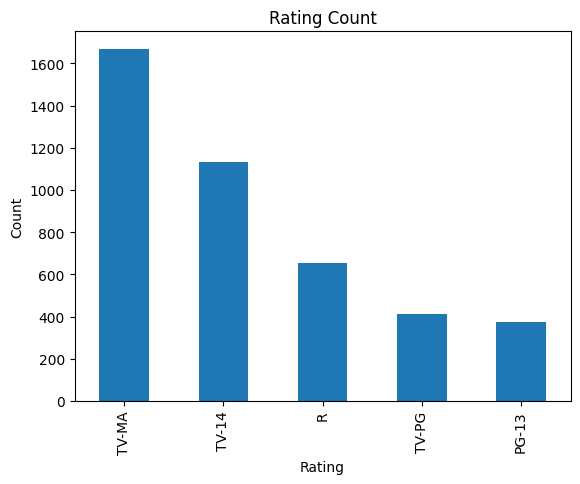

In [39]:
rate.plot(
    kind = 'bar',
    xlabel = 'Rating',
    ylabel = 'Count',
    title = 'Rating Count'
)


**Visualising the category distribution in rating TV-14**

<Axes: title={'center': 'TV-14 Category Count'}, xlabel='Category', ylabel='Count'>

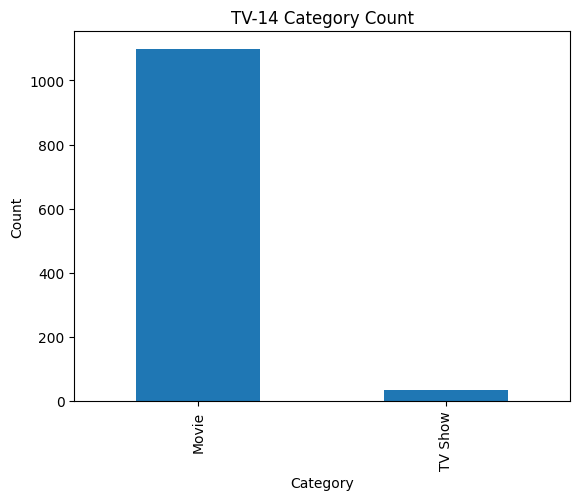

In [40]:
df.groupby('Rating').get_group('TV-14').groupby('Category')['Show_Id'].count().plot(
    kind = 'bar',
    xlabel = 'Category',
    ylabel = 'Count',
    title = 'TV-14 Category Count'
)

**Visualising the category distribution in R rating**

<Axes: title={'center': 'R Category Count'}, xlabel='Category', ylabel='Count'>

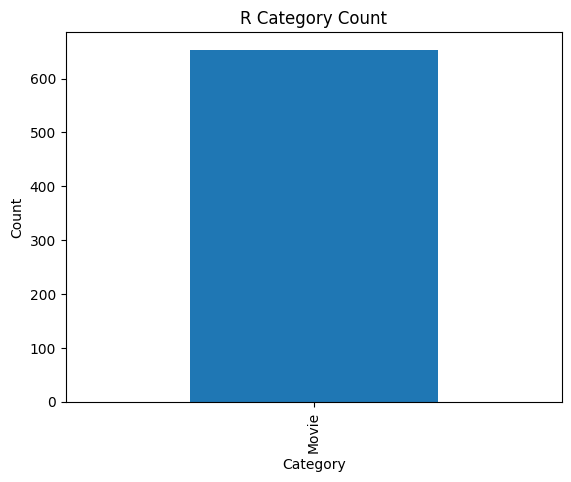

In [41]:
df.groupby('Rating').get_group('R').groupby('Category')['Show_Id'].count().plot(
    kind = 'bar',
    xlabel = 'Category',
    ylabel = 'Count',
    title = 'R Category Count'
)

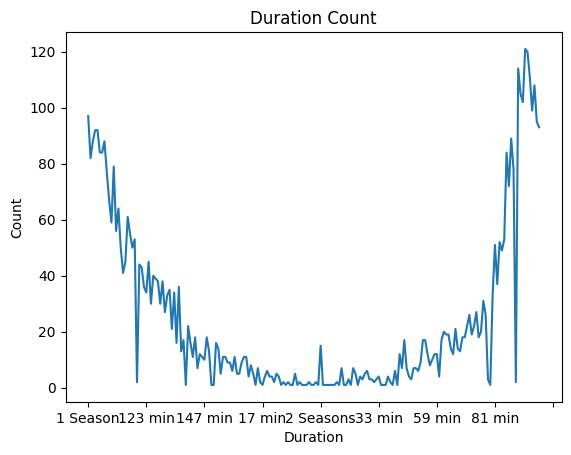

In [42]:
df.groupby('Duration')['Show_Id'].count().plot(
    kind = 'line',
    xlabel = 'Duration',
    ylabel = 'Count',
    title = 'Duration Count'
);

**Calculationg country wise distribution of content**

In [43]:
country_data = df.groupby('Country')['Show_Id'].count()

In [44]:
country_data

,Show_Id
Country,
Argentina,32
"Argentina, Brazil, France, Poland, Germany, Denmark",1
"Argentina, Chile",1
"Argentina, Chile, Peru",1
"Argentina, France",1
...,...
"Uruguay, Guatemala",1
"Uruguay, Spain, Mexico",1
Venezuela,1


In [45]:
country_data = country_data.sort_values(ascending=False).head()

In [46]:
country_data

,Show_Id
Country,
United States,1655
India,832
United Kingdom,174
Canada,104
Egypt,87


**Visualising Top 5 countries with respect to Movies/Season count**

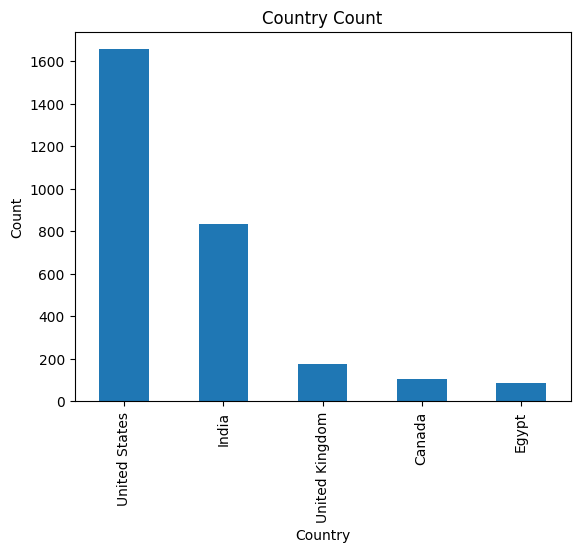

In [47]:
country_data.plot(
    kind = 'bar',
    xlabel = 'Country',
    ylabel = 'Count',
    title = 'Country Count'
);

##Answering Question

###**What is the Show ID & Directors name for 'House of Cards?**


In [51]:
df[df['Title']=='House of Cards'][['Show_Id' , 'Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


###**In which year were the highest number of movies and shows released?**

In [54]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip(), format="%B %d, %Y", errors='coerce')

In [55]:
#df.groupby('')
df['Date'] = pd.to_datetime(df['Release_Date'])

In [57]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20


In [58]:
df['year'] = df['Date'].dt.year
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018


<Axes: title={'center': 'Movie / Season per year'}, xlabel='Year', ylabel='Count'>

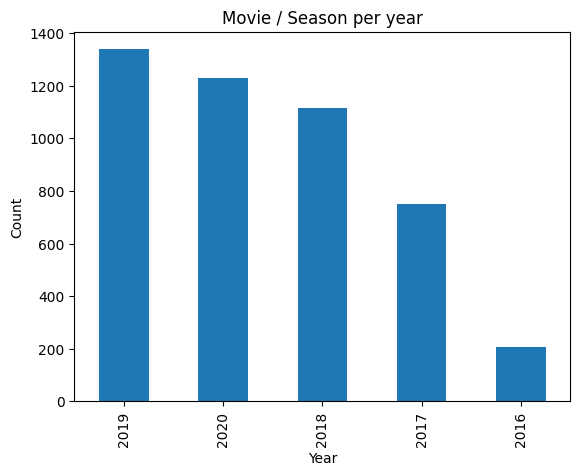

In [62]:
max_movie_season = df.groupby('year')['Show_Id'].count().sort_values(ascending =False).head()
max_movie_season.plot(
    kind ='bar',
    xlabel = 'Year',
    ylabel = 'Count',
    title = 'Movie / Season per year'
)

**Year with the max number of shows and movies was 2019**

In [63]:
max_movie_season.head(1)

,Show_Id
year,
2019,1338


###**How many Movies & TV Shows are in the dataset?**

In [66]:
distribution = df.groupby('Category').Show_Id.count().sort_values(ascending=False)
distribution

,Show_Id
Category,
Movie,4675
TV Show,136


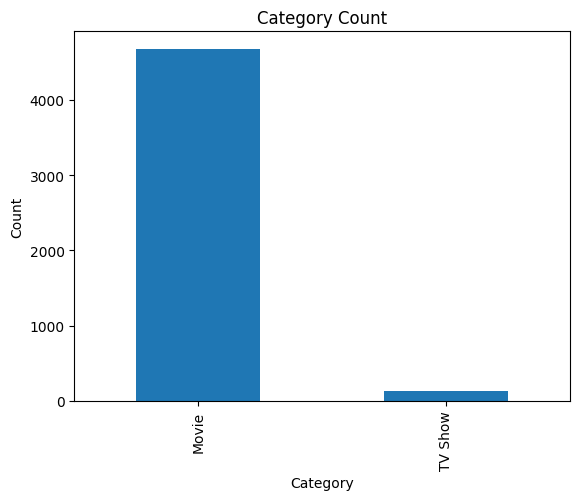

In [67]:
distribution.plot(
    kind ='bar',
    xlabel = 'Category',
    ylabel = 'Count',
    title = 'Category Count'

);

**There are a total of :**
* 4675 **Movies**
* 136 **TV Shows**

###**Show all the Movies that were released in year 2000.**

In [70]:
df[(df['year']==2000) & (df['Category']=='Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year


**The dataset contains no movies that were released in the year 2000**

###**Show only the Titles of all TV Shows that were released in India only.**

In [104]:
df[(df['Country'] == 'India') & (df['Category'] == 'TV Show')].Title

,Title
132,7 (Seven)
2406,GHOUL
3119,Jamtara - Sabka Number Ayega
4724,Paava Kadhaigal
6037,Th Eena Meena Deeka Chase Comedy Show


There are a total of 5 indian TV shows available on Netflix

###**Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?**

In [72]:
high_cont_director = df.groupby('Director')['Show_Id'].count().sort_values(ascending =False)
high_cont_director

,Show_Id
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
...,...
Ben Young,1
Jon Spira,1
Jon Turteltaub,1


In [73]:
high_cont_director.head(10)

,Show_Id
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12
Jay Chapman,12
Steven Spielberg,10
David Dhawan,9


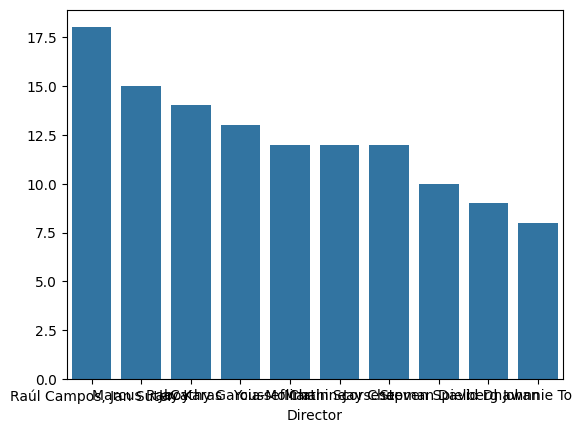

In [75]:
sns.barplot(x=high_cont_director.head(10).index,y=high_cont_director.head(10).values);

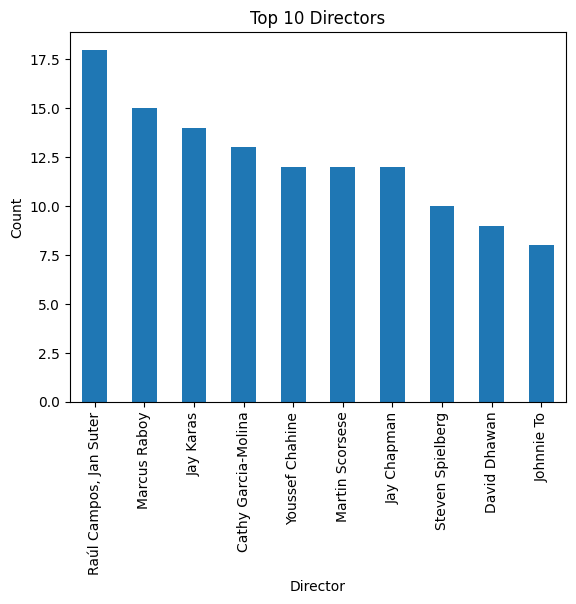

In [78]:
high_cont_director = high_cont_director.head(10)
high_cont_director.plot(
    kind = 'bar',
    xlabel = 'Director',
    ylabel = 'Count',
    title = 'Top 10 Directors'
);

###**Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".**

In [82]:
df[((df['Category'] == 'Movie') & (df['Type'] == 'Comedies')) | (df['Country'] == 'United Kingdom')].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,2018-05-01,TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018-05-01,2018


###**In how many movies/shows, Tom Cruise was cast ?**

In [86]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019


###**What are the different Ratings defined by Netflix ?**

In [88]:
print(df['Rating'].unique())

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-G' 'TV-PG' 'NR' 'PG' 'G' 'TV-Y7' 'TV-Y'
 'NC-17' 'TV-Y7-FV' 'UR']


###**How many Movies got the 'TV-14' rating, in Canada ?**

In [91]:
canada = df[(df['Category'] == 'Movie') & (df['Rating'] == 'TV-14') & (df['Country'] == 'Canada')]

In [92]:
canada.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,2018
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,2018
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12,2017
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,2019-10-14,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14,2019


In [94]:
canada.Show_Id.count()

9

###**How many TV Shows got the 'R' rating, after year 2018 ?**

In [97]:
df[(df['Rating'] == 'R') & (df['year'] > 2018)].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,2019-01-13,R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019-01-13,2019
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore",2019-04-03,R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019-04-03,2019
83,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,2019-06-28,R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",2019-06-28,2019


###**What is the maximum duration of a Movie/Show on Netflix ?**

In [103]:
max_dur_movie = df[df['Category'] == 'Movie'].Duration.max()
max_dur_movie

'99 min'

###**Which individual country has the Highest No. of TV Shows ?**

In [101]:
highest_shows_country = df.groupby('Country').Show_Id.count().sort_values(ascending =False)

In [102]:
highest_shows_country.head(1)

,Show_Id
Country,
United States,1655


###**How can we sort the dataset by Year ?**

In [100]:
sorted_by_year =df.sort_values('year')
sorted_by_year.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010
308,s309,Movie,Adam: His Song Continues,Robert Markowitz,"Daniel J. Travanti, JoBeth Williams, Richard M...",United States,2011-10-01,TV-MA,96 min,Dramas,"After their child was abducted and murdered, J...",2011-10-01,2011


###**Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.**

In [99]:
df[((df['Category'] == 'Movie') & (df['Type'] == 'Dramas')) | ((df['Category'] == 'TV Show') & (df['Type'] =="Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,2019
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020-07-01,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,2020-09-05,R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h...",2020-09-05,2020
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,2019-06-19,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019-06-19,2019
7465,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,2019-03-02,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019-03-02,2019
7480,s7479,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India",2019-05-06,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",2019-05-06,2019


##**Conclusion**

**To sum up the analysis we can state that** <br><br>


**1)** There are a total of **7789** records in the dataset from which **4811** are non null records that we used for our analysis <br><br>
**2)** We have the following features in our dataset:

    0   Show_Id      
    1   Category     
    2   Title        
    3   Director      
    4   Cast         
    5   Country       
    6   Release_Date  
    7   Rating        
    8   Duration      
    9   Type         
    10  Description**


 **3)** We observed that the rating **TV-MA** had the highest number of TV-Shows and Movies on Netflix


 **4)** In the rating **TV-MA**, there were exponentially more Movies as compared to TV-Shows


 **5)** We observed that the rating **R** had only Movies and none TV-shows on Netflix


 **6)** While analyzing the data country wise, we observed that the top 5 countries with the most Movies and TV-Shows on netflix were:
       
    1) United States	 1655
    2) India	          832
    3) United Kingdom	 174
    4) Canada	         104
    5) Egypt	           87
  
  **7)** After analyzing the data **YEAR** wise we observed that **2019** had the highest number of TV-shows and Movies released on Netflix

    1) 2019	1338
  
  **8)** While analyzing the data we observed that the Top 10 Directors with the most number of TV-Shows and Movies released on Netflix were:

    1)  Raúl Campos, Jan Suter	18
    2)  Marcus Raboy	          15
    3)  Jay Karas	             14
    4)  Cathy Garcia-Molina	   13
    5)  Youssef Chahine	       12
    6)  Martin Scorsese	       12
    7)  Jay Chapman	           12
    8)  Steven Spielberg	      10
    9)  David Dhawan	           9
    10) Johnnie To                 8
  
  **9)** We observed that netflix has the following different ratings for the content released:

    1)  TV-MA
    2)  R
    3)  PG-13
    4)  TV-14
    5)  TV-G
    6)  TV-PG
    7)  NR
    8)  PG
    9)  G
    10) TV-Y7
    11) TV-Y
    12) NC-17
    13) TV-Y7-FV
    14) UR
